In [61]:
import uhd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [62]:

usrp = uhd.usrp.MultiUSRP()

num_samps = 10000000 # number of samples received
center_freq = 2.44e9# Hz
sample_rate = 30e6 # Hz twice the BW
Fs = 56e6
gain = 0# dB
Threshhold = -60 #dB

usrp.set_rx_rate(sample_rate, 0)
usrp.set_rx_freq(uhd.libpyuhd.types.tune_request(center_freq), 0)
# usrp.set_rx_gain(gain, 0)
usrp.set_rx_agc(True, 0)

In [41]:
batch = 1000
# Set up the stream and receive buffer
st_args = uhd.usrp.StreamArgs("fc32", "sc16")
st_args.channels = [0]
metadata = uhd.types.RXMetadata()
streamer = usrp.get_rx_stream(st_args)
recv_buffer = np.zeros((1, batch), dtype=np.complex64)

# Start Stream
stream_cmd = uhd.types.StreamCMD(uhd.types.StreamMode.start_cont)
stream_cmd.stream_now = False
streamer.issue_stream_cmd(stream_cmd)

In [65]:
batch = 1000
# Set up the stream and receive buffer
st_args = uhd.usrp.StreamArgs("fc32", "sc16")
st_args.channels = [0,1]
metadata = uhd.types.RXMetadata()
streamer = usrp.get_rx_stream(st_args)
recv_buffer = np.zeros((2, batch), dtype=np.complex64)

t = uhd.types.TimeSpec(.005)

# Start Stream
stream_cmd = uhd.types.StreamCMD(uhd.types.StreamMode.start_cont)
stream_cmd.stream_now = False
# stream_cmd.time_spec = x

streamer.issue_stream_cmd(stream_cmd)

TypeError: get_frac_secs(): incompatible function arguments. The following argument types are supported:
    1. (self: uhd.libpyuhd.types.time_spec) -> float

Invoked with: <uhd.libpyuhd.types.time_spec object at 0x7fa145048eb0>, <uhd.libpyuhd.types.time_spec object at 0x7fa145048eb0>

[ERROR] [UHD] An unexpected exception was caught in a task loop.The task loop will now exit, things may not work.EnvironmentError: IOError: usb rx8 transfer status: LIBUSB_TRANSFER_NO_DEVICE


In [64]:
# Receive Samples
import numpy as np

f1 = open("RawIQ1.iq","wb")
f2 = open("RawIQ2.iq","wb")
samples = np.zeros(batch, dtype=np.complex64)
samples2 = np.zeros(batch, dtype=np.complex64)
# for i in range(num_samps//batch):
i =0
x=1000
while i <x:

    streamer.recv(recv_buffer, metadata)
    # for i in range(len(recv_buffer)):
    #     if abs(recv_buffer[0][i])< 10**(Threshhold/10):
    #         recv_buffer[0][i] = 0
    samples = recv_buffer[0]
    samples2 = recv_buffer[1]
    
    # print(max(abs(samples)))
    if sum(abs(samples))/batch > 0.00:
        # print(max(abs(samples)))
        samples.tofile(f1)
        samples2.togile(f2)
        i+= 1
        if(i%(x/100) == 0):
            print(i/x)
    

# Stop Stream
stream_cmd = uhd.types.StreamCMD(uhd.types.StreamMode.stop_cont)
streamer.issue_stream_cmd(stream_cmd)

# we will only take the FFT of the first 1024 samples, see text below


KeyboardInterrupt: 

6857000
0.012145046208657185


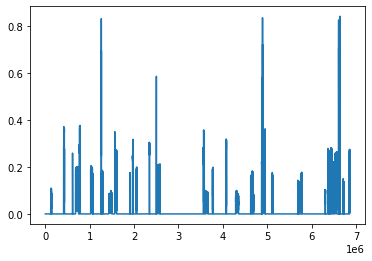

TypeError: 'numpy.int16' object is not iterable

In [73]:
import numpy as np
import matplotlib.pyplot as plt
samples = np.fromfile('RawIQ.iq', np.complex64) # Read in file.  We have to tell it what format it is
print(len(samples))
print(sum(abs(samples))/num_samps)
# plt.figure(figsize=(10, 10), dpi=500)
# Plot constellation to make sure it looks right
plt.plot(np.abs(samples))
# # lt.grid(True)
plt.show()
plt.close()
# plt.figure(figsize=(20, 20), dpi=500)
# plt.plot(np.real(samples),np.imag(samples),'.')
# plt.show()

# data = [[] for _ in range(len(samples))]
# i = 0
# for sample in samples:
#     if abs(sample) != 0:
#         data[i].append(sample)
#     else:
#         i+=1
# for i in range(len(data)):
#     if data[i] == []:
#         del(data[i])
# print(data)
from itertools import groupby
def split_a_list_at_zeros(L):
    return [list(g) for k, g in groupby(L, key=lambda x:x!=0) if k]

my_list = [split_a_list_at_zeros(item) for item in list(np.int16(np.abs(samples)*1024))]

my_list